<a href="https://colab.research.google.com/github/Abungo/Abungo/blob/main/breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [ ]:
url = "https://raw.githubusercontent.com/Abungo/copypaste/main/breastCancer.csv"
df=pd.read_csv(url)

In [ ]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]

In [ ]:
en = LabelEncoder()
en.fit(y)
y = en.transform(y)

In [ ]:
#scaling the training data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=3, test_size = 0.25)

In [ ]:
model = Sequential()
#model.add(Dense(16,input_dim = 30, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,input_dim = 30,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=2)

Epoch 1/50
14/14 - 1s - loss: 0.7811 - accuracy: 0.5164 - val_loss: 0.6481 - val_accuracy: 0.6084 - 847ms/epoch - 61ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.6009 - val_loss: 0.5746 - val_accuracy: 0.6993 - 66ms/epoch - 5ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6122 - accuracy: 0.6643 - val_loss: 0.5131 - val_accuracy: 0.7413 - 72ms/epoch - 5ms/step
Epoch 4/50
14/14 - 0s - loss: 0.5489 - accuracy: 0.7300 - val_loss: 0.4606 - val_accuracy: 0.7972 - 60ms/epoch - 4ms/step
Epoch 5/50
14/14 - 0s - loss: 0.4958 - accuracy: 0.7770 - val_loss: 0.4179 - val_accuracy: 0.8462 - 68ms/epoch - 5ms/step
Epoch 6/50
14/14 - 0s - loss: 0.4527 - accuracy: 0.8099 - val_loss: 0.3829 - val_accuracy: 0.8811 - 71ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.4171 - accuracy: 0.8404 - val_loss: 0.3538 - val_accuracy: 0.9021 - 66ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.3872 - accuracy: 0.8685 - val_loss: 0.3278 - val_accuracy: 0.9091 - 54ms/epoch - 4ms/step
Epoch 9/50
14/14 - 0s 

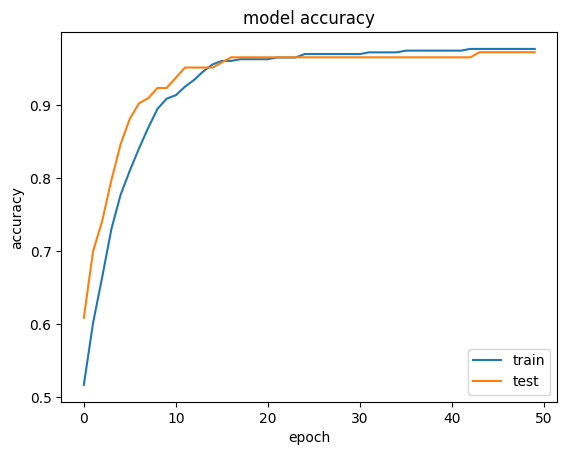

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

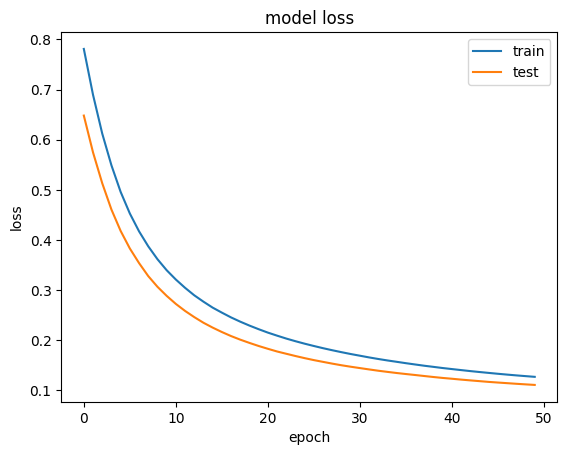

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_n = y_pred >= 0.5

5/5 [==============================] - 0s 2ms/step


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred_n

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred_n)
confusion_mat

array([[89,  1],
       [ 3, 50]])

In [ ]:
result = classification_report(y_test,y_pred_n)
print()
print("Classification Results")
print(result)


Classification Results
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

